TU Delft internship of Bordeaux ENSEIRB -MATMECA student Anouchka Desmettre 
Dates: June 1st - August 31st, 2024 

Supervision: D. Lahaye (DIAM - EEMCS Faculty - TU Delft)

# Title: Mathematical modelling and numerical simulation of driving buses and vibrations door   

## 4 Two Point Mass System 

In [25]:
using DifferentialEquations
using Plots
using Statistics  
using SymPy
using SpecialFunctions

### 4.1 Case-study/Description/Motion

Consider a model with two interconnected point masses (2-DOF along x-axis). This can represent various scenarios such as a bus and door, two doors, a door separated into two parts, or a door separated into a glass and metal frame. The motion of the system can be described using the displacement of each mass along the x-axis.

### 4.2 Mathematical Model 

#### ODE for Two Mass-Spring-Damper System

Consider a system of two coupled point masses with the following equations of motion:

$
\begin{cases}
m_1 \ddot{u}_1 + \gamma_1 \dot{u}_1 + \gamma_2 (\dot{u}_1 - \dot{u}_2) + k_1 u_1 + k_2 (u_1 - u_2) =  F_{external1}(t) \\ 
m_2 \ddot{u}_2 + \gamma_3 \dot{u}_2 + \gamma_2 (\dot{u}_2 - \dot{u}_1) + k_3 u_2 + k_2 (u_2 - u_1) = F_{external2}(t) 
\end{cases}
$

where:

- $ m_1 $ and $ m_2 $ are the masses.
- $\gamma_1$: Damping coefficient associated with $u_1$, $\gamma_2$: Shared damping coefficient affecting both $u_1$ and $u_2$, $\gamma_3$: Damping coefficient associated with $u_2$.
- $k_1$: Spring constant related to $u_1$, $k_2$: Shared spring constant between $u_1$ and $u_2$, $k_3$: Spring constant related to $u_2$.
- $F_{\text{external1}}(t)$: External force acting on $u_1$, $F_{\text{external2}}(t)$: External force acting on $u_2$.

#### Initial Conditions

The system starts from rest, so the initial conditions are:

$
u_1(0) = 0 \quad \text{(zero initial position of mass 1)}
$

$
\dot{u}_1(0) = 0 \quad \text{(zero initial velocity of mass 1)}
$

$
u_2(0) = 0 \quad \text{(zero initial position of mass 2)}
$

$
\dot{u}_2(0) = 0 \quad \text{(zero initial velocity of mass 2)}
$

### 4.3 Parameter values

1. **Masses $m_1$ and $m_2$:**  
Between 50 and 100 kg for each mass.

2. **Spring Constants $k_1$ and $k_2$:** 
These are chosen such that $\sqrt{\frac{k_1}{m_1}}$ and $\sqrt{\frac{k_3}{m_2}}$ match the measured resonant frequencies $\omega_{01}$ and $\omega_{02}$, respectively:
   $ k_1 = m_1 \omega_{01}^2 $ and $ k_3 = m_2 \omega_{02}^2 $ (simple harmonic motion).

3. **Damping Coefficients $\gamma_1$, $\gamma_2$, $\gamma_3$:**
Estimation of these coefficients is challenging. Typically determined through experimental measurements or tuning based on observed system behavior.

### 4.4 Impact study 

**Modeling a Two-Mass System with Four Nodes and Three Springs without Damping**

#### Case Description

Consider a system with four nodes (two movable and two static) connected by three springs ($k_1$, $k_2$ and $k_3$). The first and last nodes are fixed, while the middle nodes contain the masses $m_1$ and $m_2$. 

<img src="2masses_3springs.png" alt="2masses_3springs">

#### Equations of Motion

An impulsive force $ F_0 \delta(t - t_0) $ is applied to one of the masses, either $ m_1 $ or $ m_2 $.

$
\begin{cases}
m_1 \ddot{u}_1 + k_1 u_1 + k_2 (u_1 - u_2) = F_0 \delta(t - t_0) \\ 
m_2 \ddot{u}_2 + k_3 u_2 + k_2 (u_2 - u_1) = 0
\end{cases}
$

These equations describe the dynamic behavior of the two-mass system when an impulsive force $ F_0 \delta(t - t_0) $ is applied to the first mass at time $t_0$.

#### Analytical Solution without damping using Matrix 

1. **Definition of the Connectivity Matrix, the Diagonal Matrix of Spring Constants and the Diagonal Mass Matrix**

The connectivity matrix $ B $ describes the kinematics (geometry of interconnections) between the points and the springs : 
$ 
B = \begin{pmatrix} 
1 & -1 & 0 & 0 \\
0 & 1 & -1 & 0 \\
0 & 0 & 1 & -1 \\
\end{pmatrix} 
$

The diagonal matrix $D$ contains the values of the spring constants. This matrix is of size $ 3 \times 3 $ because there are three springs 
$ 
D = \begin{pmatrix} 
k_1 & 0 & 0 \\
0 & k_2 & 0 \\
0 & 0 & k_3
\end{pmatrix} 
$

The diagonal matrix $M$ contains the values of the masses. This matrix is of size $ 2 \times 2 $ because there are two masses 
$ 
M = \begin{pmatrix} 
m_1 & 0 \\
0 & m_2 \\
\end{pmatrix} 
$


2. **Calculation of the Weighted Laplacian Matrix**

The weighted Laplacian matrix $ K $ is obtained by multiplying $ B $, $ D $, and the transpose of $ B $ : $ K = B^\top D B $

We compute:
$ 
K = \begin{pmatrix} 
1 & 0 & 0 \\ -1 & 1 & 0 \\ 0 & -1 & 1 \\ 0 & 0 & -1 \\ 
\end{pmatrix}
\begin{pmatrix} 
k_1 & 0 & 0  \\
0 & k_2 & 0  \\
0 & 0 & k_3 
\end{pmatrix}
\begin{pmatrix} 
1 & -1 & 0 & 0 \\
0 & 1 & -1 & 0 \\
0 & 0 & 1 & -1 \\
\end{pmatrix} 
\iff K = \begin{pmatrix} k_1 & -k_1 & 0 & 0 \\ -k_1 & k_1 + k_2 & -k_2 & 0 \\ 0 & -k_2 & k_2 + k_3 & -k_3 \\ 0 & 0 & -k_3 & k_3 \\\end{pmatrix} 
$

3. **Extraction of the Submatrix $ K_0 $**

The submatrix $ K_0 $ is obtained by removing the first and last rows and columns of $ K $, representing the fixed points.

$ K_0 = \begin{pmatrix}
k_1 + k_2 & -k_2 \\
-k_2 & k_2 + k_3
\end{pmatrix} $. Thus, $ K_0 $ only contains the elements corresponding to the mobile node

4. **Writing the System Equation with an Impulsive Force**:

The equation of motion with an impulsive force $ F_0 \delta(t - t_0) $ applied to $ m_1 $ is given by:

$ 
M \ddot{\vec{u}}(t) + K_0 \vec{u}(t) = \vec{F}(t) 
$, where $ \vec{F}(t) $ is : $ 
\vec{F}(t) = \begin{pmatrix} 
F_0 \delta(t - t_0) \\
0 
\end{pmatrix}
$

5. **Solving the System Equation**

- Rewrite the second-order differential equations as a first-order system by defining the state vector state vector $z$ to include both the displacements ($u$) and the velocities ($\dot{u}$)

So we create : $z = \begin{pmatrix} u_1 \\ u_2 \\ \dot{u}_1 \\ \dot{u}_2 \end{pmatrix}$, the state-space representation can be written as : $ \dot{z} = A z + F \iff \dot{z} = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & 0 & 0 \\ \frac{k_2}{m_2} & -\frac{k_2 +k_3}{m_2} & 0 & 0 \end{pmatrix} z + \begin{pmatrix} 0 \\ 0 \\ \frac{ F_0 \delta(t - t_0)}{m_1} \\ 0 \end{pmatrix} \iff
\dot{z} = \begin{pmatrix} 0 & I \\ - M^{-1}K_0 & 0 \end{pmatrix} z + \begin{pmatrix} 0 \\ M^{-1}F \end{pmatrix} $

In order to simplify the system, we set $ k_1 = k_2 = k_3 = k$. 

- Compute Eigenvalues and Eigenvectors

Compute the eigenvalues and eigenvectors of matrix A.

- Construct Modal Coordinates

Construct the modal coordinates using the inverse of matrix : $ \mathbf{q} = \mathbf{V}^{-1} \mathbf{z} $, where $u$ is the vector of displacements and velocities.

- Transform the System into Modal Coordinates

Transform the system of differential equations into modal coordinates : $\mathbf{\dot{q}} = \mathbf{V}^{-1} \mathbf{A} \mathbf{V} \mathbf{q} + \mathbf{V}^{-1} \mathbf{F}$.

- Solve the System in Modal Coordinates

Solve the transformed system of equations in modal coordinates : $ \mathbf{\ddot{q}_i + \lambda_i \dot{q}_i = F_{modal,i} }$, where $ \lambda_i $ are the eigenvalues and $q_i$ are the modal coordinates and $F_{modal,i}$ the modal external force.

- Convert Back to Original Coordinates

Convert the solutions from modal coordinates back to the original coordinates : $ \mathbf{z}(t) = \mathbf{V} \mathbf{q}(t) $ to obtain the solutions in terms of displacements and velocities $u_i(t)$.

In [26]:
# Define symbols
@syms λ k m1 m2 γ t t0 F0 sigma

# Define symbolic matrix A
A = sympy.Matrix( 4, 4, 
    [
    0, 0, 1, 0,
    0, 0, 0, 1,
    -(2*k / m1), k / m1, 0, 0,
    k / m2, -2*k / m2, 0, 0
])

# Calculate symbolic eigenvalues of A
λ = A.eigenvals()
display(λ)

V = A.eigenvects()

λ_values = collect(keys(λ))
V_matrix = []

# Iterate over each tuple (eigenvalue, list of eigenvectors)
for item in V
    eigenvalue, _, eigenvectors_list = item
    for eigenvector_matrix in eigenvectors_list
        # Each 'eigenvector_matrix' contains an eigenvector as a matrix
        # Extract the eigenvector, which is the only element in the list
        push!(V_matrix, eigenvector_matrix)
    end
end

# Concatenate all eigenvectors into columns to form matrix V
V_matrix = hcat(V_matrix...)
display(V_matrix)

Dict{Sym{PyCall.PyObject}, Sym{PyCall.PyObject}} with 4 entries:
  -sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)) => 1
  -sqrt(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)) => 1
  sqrt(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))  => 1
  sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))  => 1

4×4 Matrix{Sym{PyCall.PyObject}}:
 -(-4*m1 - m2)*sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/(3*k) + 2*m1*m2*(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))^(3/2)/(3*k^2)  …  (-4*m1 - m2)*sqrt(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/(3*k) - 2*m1*m2*(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))^(3/2)/(3*k^2)
 -(-2*m1 - 2*m2)*sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/(3*k) + m1*m2*(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))^(3/2)/(3*k^2)     (-2*m1 - 2*m2)*sqrt(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/(3*k) - m1*m2*(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))^(3/2)/(3*k^2)
                                                                                             2 + m2*(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/k                                                                                                2 + m2*(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/k
                              

We simplified the expression : 

$$\lambda_i = \pm \sqrt{-\frac{k}{m_1} - \frac{k}{m_2} \pm \frac{k\sqrt{m_1^2 - m_1 m_2 + m_2^2}}{m_1 m_2}}$$ by substituting terms with the squares of the angular frequencies $\omega_{01}^2 = \frac{k}{m_1}$ and $\omega_{02}^2 = \frac{k}{m_2}$, then rearranging to express the equation in a form similar to $-iw$, where $w$ is a complex frequency, common in the analysis of dynamic systems:

$$
\pm i \sqrt{\omega_{01}^2 + \omega_{02}^2 \mp \sqrt{\omega_{01}^4 + \omega_{01}^2 \omega_{02}^2 + \omega_{02}^4}}
$$


In [27]:
# Transform A and F into modal coordinates
V_inv = V_matrix.inv()
A_modal = V_inv * A * V_matrix

# Define the cosine function as the external force
function cosine_force(t, ω, F0)
    return F0 * cos(ω * t)
end

# Define the frequency of the cosine force
ω = 2.0  # Example frequency

# Create the force vector F, with the cosine force acting on the third component
F = [0; 0; cosine_force(t, ω, F0)/m1; 0]

# Transform the force vector into modal coordinates
F_modal = V_inv * F 

# Solve the system in each modal coordinate, including the force term
q_solutions = []
q = SymFunction("q")  # Define a symbolic function q for modal coordinates
for i in 1:length(λ_values)
    # Set up the differential equation for each modal coordinate
    eq = sympy.Eq(sympy.Derivative(q(t), t, t) + λ_values[i] * q(t), F_modal[i])

    # Solve the differential equation with specified initial conditions
    ics = Dict(q(t)(0) => 0, sympy.Derivative(q(t), t)(0) => 0) 
    println("Starting equation resolution for i = ", i)
    sol = dsolve(eq, q(t), ics=ics)
    println("Equation solved for i = ", i)
    push!(q_solutions, sol)
end

Starting equation resolution for i = 1
Equation solved for i = 1
Starting equation resolution for i = 2
Equation solved for i = 2
Starting equation resolution for i = 3
Equation solved for i = 3
Starting equation resolution for i = 4
Equation solved for i = 4


In [28]:
# Convert q(t) solutions to a column matrix
q_solutions_matrix = [sol.rhs for sol in q_solutions]  # Extract the right-hand side (rhs) of each equation
q_solutions_matrix = sympy.Matrix(q_solutions_matrix)  # Convert to a SymPy matrix

# Multiply by the eigenvector matrix to obtain z(t)
z_solutions = V_matrix * q_solutions_matrix

# Extract the displacements u1(t) and u2(t)
u1_t = z_solutions[1, :]  # Assume that u1(t) is on the first row
u2_t = z_solutions[2, :]  # Assume that u2(t) is on the second row

# Simplify the expressions for u1(t) and u2(t)
u1_t_simplified = simplify(u1_t)
u2_t_simplified = simplify(u2_t)

# Print the simplified expressions for u1(t) and u2(t)
println("Simplified u1(t) = ", u1_t_simplified)
println("Simplified u2(t) = ", u2_t_simplified)

Simplified u1(t) = Sym{PyCall.PyObject}[(-(-4*m1 - m2)*sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/(3*k) + 2*m1*m2*(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))^(3/2)/(3*k^2))*(-F0*exp(t*(k*(-1/m2 - 1/m1 - sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)))^(1/4))/(8.0*(m1^2 - m1*m2 + m2^2)^0.5*(-k/m2 - k/m1 - k*(m1^2 - m1*m2 + m2^2)^0.5/(m1*m2))^0.5 + 32.0*(m1^2 - m1*m2 + m2^2)^0.5) - F0*exp(-t*(k*(-1/m2 - 1/m1 - sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)))^(1/4))/(8.0*(m1^2 - m1*m2 + m2^2)^0.5*(-k/m2 - k/m1 - k*(m1^2 - m1*m2 + m2^2)^0.5/(m1*m2))^0.5 + 32.0*(m1^2 - m1*m2 + m2^2)^0.5) + F0*cos(2.0*t)/((4.0*(k*(-1/m2 - 1/m1 - (m1^2 - m1*m2 + m2^2)^0.5/(m1*m2)))^0.5 + 16.0)*(m1^2 - m1*m2 + m2^2)^0.5)) + ((-4*m1 - m2)*sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/(3*k) - 2*m1*m2*(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))^(3/2)/(3*k^2))*(-F0*exp(t*(k*(-1/m2 - 1/m1 + sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)))^(1/4))/(8.0*(m1^2 - m1*m2 + m2^2)^0.5*(-k/m2 - k/m1 + k*(m1^2 - m1*m2 + m

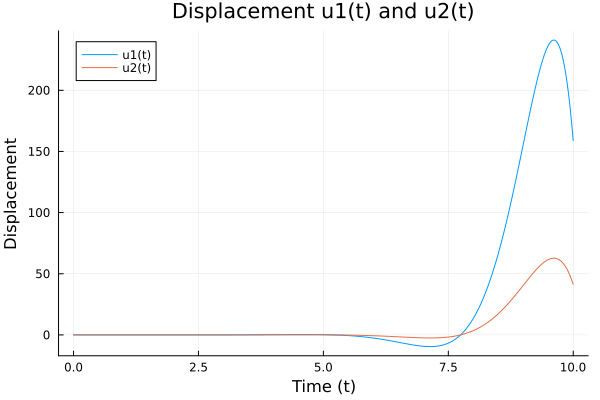

In [29]:
 # Parameters
m1_val = 75.0  # Mass of object 1 (in kg)
m2_val = 85.0  # Mass of object 2 (in kg)
ω_val = 2.0    # Resonant frequency for mass 1
k_val = m1_val * ω_val^2  # Spring constant k derived from mass and frequency
F0_val = 5     # Amplitude of the external force
t0_val = 5.0   # Time of force application
sigma_val = 0.18  # Standard deviation for Gaussian pulse, simulating a Dirac delta

# Substitute the parameters into the symbolic expressions
u1_t_subs = u1_t_simplified.subs([(m1, m1_val), (m2, m2_val), (k, k_val), (F0, F0_val), (t0, t0_val), (sigma, sigma_val)])
u2_t_subs = u2_t_simplified.subs([(m1, m1_val), (m2, m2_val), (k, k_val), (F0, F0_val), (t0, t0_val), (sigma, sigma_val)])

# Evaluate the expressions over the time interval
t_values = 0:0.011:10  # Time interval from 0 to 10 with a step of 0.011
u1_values = [float(subs(u1_t_subs[i], t => val)) for val in t_values, i in 1:size(u1_t_subs, 1)]  # Compute u1(t) for each t in t_values
u2_values = [float(subs(u2_t_subs[i], t => val)) for val in t_values, i in 1:size(u2_t_subs, 1)]  # Compute u2(t) for each t in t_values

# Extract the real part of the computed values
u1_values_real = [real(u1) for u1 in u1_values]
u2_values_real = [real(u2) for u2 in u2_values]

# Plot the results
plot(t_values, u1_values_real, label="u1(t)", title="Displacement u1(t) and u2(t)", xlabel="Time (t)", ylabel="Displacement")
plot!(t_values, u2_values_real, label="u2(t)")

**Modeling a Two-Mass System with Four Nodes and Three Springs with Damping**

#### Case Description

We consider the same system as before, but three dampers $\gamma_1$, $\gamma_2$, and $\gamma_3$ connected along with the springs have been added.

<img src="DAMPING.png" alt="DAMPING">

### Equations of Motion

$
\begin{cases}
m_1 \ddot{u}_1 + \gamma_1 \dot{u}_1 + \gamma_2 (\dot{u}_1 - \dot{u}_2) + k_1 u_1 + k_2 (u_1 - u_2) = F_0 \delta(t - t_0) \\ 
m_2 \ddot{u}_2 + \gamma_3 \dot{u}_2 + \gamma_2 (\dot{u}_2 - \dot{u}_1) + k_3 u_2 + k_2 (u_2 - u_1) = 0
\end{cases}
$


#### Analytical Solution adding Damping using Matrix

1. **Definition of the Diagonal Damping Coefficient Matrix**

The diagonal matrix $ \Gamma $ contains the values of the damping coefficients.

$ \Gamma = \begin{pmatrix} 
\gamma_1 & 0 & 0 \\
0 & \gamma_2 & 0 \\
0 & 0 & \gamma_3
\end{pmatrix}
$

2. **Calculation of the Weighted Laplacian Matrix for Damping and Extraction of the Submatrix $ C_0 $**


The weighted Laplacian matrix $ C $ is obtained by multiplying $ B $, $ \Gamma $, and the transpose of $ B $.

$ 
C = B^\top \Gamma B \iff  
C = \begin{pmatrix}
\gamma_1 & -\gamma_1 & 0 & 0 \\
-\gamma_1 & \gamma_1 + \gamma_2 & -\gamma_2 & 0 \\
0 & -\gamma_2 & \gamma_2 + \gamma_3 & -\gamma_3 \\
0 & 0 & -\gamma_3 & \gamma_3
\end{pmatrix}
$

The submatrix $ C_0 $ is obtained by removing the first and last rows and columns of $ C $, it only contains the elements corresponding to the mobile node.

$ 
C_0 = \begin{pmatrix} 
\gamma_1 + \gamma_2 & -\gamma_2 \\
-\gamma_2 & \gamma_2 + \gamma_3
\end{pmatrix} 
$

3. **Writing the System Equation with Damping and finding the Solution**

The equation of motion with damping is given by : $ M \ddot{\vec{u}}(t) + C_0 \dot{\vec{u}}(t) + K_0 \vec{u}(t) = \vec{F}(t)$

- Rewrite the second-order differential equations as a first-order system by defining the state vector state vector $z$ to include both the displacements ($u$) and the velocities ($\dot{u}$)

So we create : $z = \begin{pmatrix} u_1 \\ u_2 \\ \dot{u}_1 \\ \dot{u}_2 \end{pmatrix}$, the state-space representation can be written as : $ \dot{z} = A z + F \iff \dot{z} = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & -\frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & -\frac{k_2 +k_3}{m_2} & \frac{\gamma_2}{m_2} & -\frac{\gamma_2 +\gamma_3}{m_2} \end{pmatrix} z + \begin{pmatrix} 0 \\ 0 \\ \frac{1}{m_1} \\ 0 \end{pmatrix} F_0 \delta(t - t_0) \iff
\dot{z} = \begin{pmatrix} 0 & I \\ - M^{-1}K_0 & - M^{-1}C_0 \end{pmatrix} z + \begin{pmatrix} 0 \\ M^{-1}F \end{pmatrix} $


- Find the Eigenvalues $\lambda$ and the Eigenvectors $V$ of the System Matrix

We calculate : $ \text{det}(A - \lambda I) = 0  \iff 
\begin{bmatrix} -\lambda & 0 & 1 & 0 \\
0 & -\lambda & 0 & 1 \\
-\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\
\frac{k_2}{m_2} & -\frac{k_2 + k_3}{m_2} & \frac{\gamma_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2}
\end{bmatrix} = 0
$


We expand along the first row : $-\lambda \begin{bmatrix} -\lambda & 0 & 1 \\0 & -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & \frac{\gamma_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{bmatrix} + \begin{bmatrix} 0 & -\lambda & 1 \\ -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & -\frac{k_2 + k_3}{m_2}& -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{bmatrix} $

We expand again along the first row for each matrix :  $-\lambda^{2} \begin{bmatrix} -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{\gamma_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{bmatrix} - \lambda \begin{bmatrix}0 & -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} \\ \frac{k_2}{m_2} & \frac{\gamma_2}{m_2} & \end{bmatrix} + \lambda \begin{bmatrix} -\frac{k_1+k_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{bmatrix} + \begin{bmatrix} -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} \\ \frac{k_2}{m_2} & -\frac{k_2 + k_3}{m_2}& \end{bmatrix}  $


We attempted various techniques to find the roots of the polynomial equation derived from this determinant, but they proved exceedingly complex. Therefore, we opted to simplify the system by setting $ k_1 = k_2 = k_3 = k$, and $\gamma_1 = \gamma_2 = \gamma_3 = \gamma$. 

This is the new equations we want to solve : 
$
\begin{cases}
m_1 \ddot{u}_1 +  \gamma (2\dot{u}_1 - \dot{u}_2) + k (2u_1 - u_2) = F_0 \delta(t - t_0) \\ 
m_2 \ddot{u}_2 +  \gamma (2\dot{u}_2 - \dot{u}_1) + k (2u_2 - u_1) = 0
\end{cases}
$

The new state-space representation can be written as : $ \dot{z} = A z + F \iff \dot{z} = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ -\frac{2k}{m_1} & \frac{k}{m_1} & -\frac{2\gamma}{m_1} & \frac{\gamma}{m_1} \\ \frac{k}{m_2} & -\frac{2k}{m_2} & \frac{\gamma}{m_2} & -\frac{2\gamma}{m_2} \end{pmatrix} z + \begin{pmatrix} 0 \\ 0 \\ \frac{F_0 \delta(t - t_0)}{m_1} \\ 0 \end{pmatrix} $

Following the same steps as explained above, we tried to calculate the values of $u_1(t)$ and $u_2(t)$ as follows: 

In [11]:
# Define symbols
@syms λ k m1 m2 γ t t0 F0 sigma

# Define symbolic matrix A using a list of lists
A = sympy.Matrix(4, 4, [
    0, 0, 1, 0,
    0, 0, 0, 1,
    -(2*k / m1), k / m1, -2*γ / m1, γ / m1,
    k / m2, -2*k / m2, γ / m2, -2*γ / m2])

# Calculate symbolic eigenvalues and eigenvectors of A
λ = A.eigenvals()
V = A.eigenvects()

4-element Vector{Tuple{Sym{PyCall.PyObject}, Sym{PyCall.PyObject}, Vector{Matrix{Sym{PyCall.PyObject}}}}}:
 (Piecewise((-sqrt(-2*(-((2*k*m1 + 2*k*m2 + 3*γ^2)/(m1*m2) - 3*(2*m1*γ + 2*m2*γ)^2/(8*m1^2*m2^2))^3/108 + ((2*k*m1 + 2*k*m2 + 3*γ^2)/(m1*m2) - 3*(2*m1*γ + 2*m2*γ)^2/(8*m1^2*m2^2))*(3*k^2/(m1*m2) + k*γ^2/(2*m2^3) - 3*k*γ^2/(2*m1*m2^2) - 3*k*γ^2/(2*m1^2*m2) + k*γ^2/(2*m1^3) - 3*γ^4/(16*m2^4) + 3*γ^4/(8*m1^2*m2^2) - 3*γ^4/(16*m1^4))/3 - (-2*k*γ/m2^2 + 2*k*γ/(m1*m2) - 2*k*γ/m1^2 + γ^3/m2^3 + γ^3/m1^3)^2/8)^(1/3) - 2*(2*k*m1 + 2*k*m2 + 3*γ^2)/(3*m1*m2) + (2*m1*γ + 2*m2*γ)^2/(4*m1^2*m2^2))/2 - sqrt(2*(-((2*k*m1 + 2*k*m2 + 3*γ^2)/(m1*m2) - 3*(2*m1*γ + 2*m2*γ)^2/(8*m1^2*m2^2))^3/108 + ((2*k*m1 + 2*k*m2 + 3*γ^2)/(m1*m2) - 3*(2*m1*γ + 2*m2*γ)^2/(8*m1^2*m2^2))*(3*k^2/(m1*m2) + k*γ^2/(2*m2^3) - 3*k*γ^2/(2*m1*m2^2) - 3*k*γ^2/(2*m1^2*m2) + k*γ^2/(2*m1^3) - 3*γ^4/(16*m2^4) + 3*γ^4/(8*m1^2*m2^2) - 3*γ^4/(16*m1^4))/3 - (-2*k*γ/m2^2 + 2*k*γ/(m1*m2) - 2*k*γ/m1^2 + γ^3/m2^3 + γ^3/m1^3)^2/8)^(1/3) + (

Now we want to replicate the solution obtained for the single point mass-damper-spring system. To achieve this, we set $k_3 = 0 $, choose $ k_2 $ to be very large, and set $ m_1 = m_2 $ with $\gamma_2 = \gamma_3 = 0$.

#### Replicate the solution obtained for the single point mass-damper-spring system


In [17]:
# Parameters for a single mass system
m = 75
ω0 = 2 * π * 1.5  # Resonant frequency multiplied by 2π for angular frequency
k = m * ω0^2      # Spring constant k derived from mass and resonant frequency

# Parameters for a two mass system
m1 = m
m2 = m

k1 = k             # Same as the single mass system
k2 = k1 * 10^6     # Spring constant k2 (very large to simulate stiff coupling)
k3 = 0             # Spring constant k3 is zero

γ1 = γ             # Damping coefficient identical to the single mass system
γ2 = γ1 * 10^6     # Damping coefficient γ2 (very large)
γ3 = 0             # Damping coefficient γ3 is zero

# Define the external impulsive force (Dirac) on mass 1 at t = 0.5
F0 = 5
t0 = 5.0                     # Time of impact
sigma = 0.18                 # Width of Gaussian pulse
epsilon = 0.01               # Width of the Dirac delta approximation

# Define the symbolic matrix A
A = sympy.Matrix( 4, 4, 
    [
    0, 0, 1, 0,
    0, 0, 0, 1,
    -(k1 + k2) / m1, k2 / m1, -γ1 + -γ2 / m1, γ2 / m1,
    k2 / m2, -(k2 + k3) / m2, γ2 / m2, -γ2 - γ3 / m2
])

# Calculate eigenvalues of A
λ = A.eigenvals()
V = A.eigenvects()

# Collect eigenvalues and prepare the eigenvector matrix
λ_values = collect(keys(λ))
V_matrix = []

# Iterate over each tuple (eigenvalue, list of eigenvectors)
for item in V
    eigenvalue, _, eigenvectors_list = item
    for eigenvector_matrix in eigenvectors_list
        # Each 'eigenvector_matrix' contains an eigenvector as a matrix
        # Extract the eigenvector, which is the only element in the list
        push!(V_matrix, eigenvector_matrix)
    end
end

# Concatenate all eigenvectors into columns to form the matrix V
V_matrix = hcat(V_matrix...)

# Transform A and F into modal coordinates
V_inv = V_matrix.inv()
A_modal = V_inv * A * V_matrix

# Define the Gaussian pulse which approximates a Dirac delta function
function gaussian_pulse(t, t0, F0, sigma)
    return F0 * exp(-((t - t0)^2) / (2 * sigma^2))
end

F = [0; 0; gaussian_pulse(t, t0, F0, sigma)/m1; 0]

F_modal = V_inv * F 

# Solve the system in each modal coordinate, including the force term
q_solutions = []
q = SymFunction("q")
for i in 1:length(λ_values)
    # Setup the differential equation
    eq = sympy.Eq(sympy.Derivative(q(t), t, t) + λ_values[i] * q(t), F_modal[i])

    # Solve the differential equation with correct initial conditions
    ics = Dict(q(t)(0) => 0, sympy.Derivative(q(t), t)(0) => 0)
    println("Starting the equation resolution for i = ", i)
    sol = dsolve(eq, q(t), ics=ics)
    println("Equation solved for i = ", i)
    push!(q_solutions, sol)
end

q_solutions;  # The semicolon suppresses direct output, use display or println to view results

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/anouchka/.julia/packages/PyCall/1gn3u/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'sympy.polys.polyerrors.CoercionFailed'>
CoercionFailed('expected an integer, got -425901979744668465596647004070659673/16000000000000000')
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/matrices/matrices.py", line 2177, in inv
    return _inv(self, method=method, iszerofunc=iszerofunc,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/matrices/inverse.py", line 459, in _inv
    rv = M.inverse_GE(iszerofunc=iszerofunc)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/matrices/matrices.py", line 2162, in inverse_GE
    return _inv_GE(self, iszerofunc=iszerofunc)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/matrices/inverse.py", line 242, in _inv_GE
    red = big.rref(iszerofunc=iszerofunc, simplify=True)[0]
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/matrices/matrices.py", line 172, in rref
    return _rref(self, iszerofunc=iszerofunc, simplify=simplify,
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/matrices/reductions.py", line 320, in _rref
    mat, pivot_cols, _ = _row_reduce(M, iszerofunc, simpfunc,
                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/matrices/reductions.py", line 124, in _row_reduce
    mat, pivot_cols, swaps = _row_reduce_list(list(M), M.rows, M.cols, M.one,
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/matrices/reductions.py", line 65, in _row_reduce_list
    assumed_nonzero, newly_determined = _find_reasonable_pivot(
                                        ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/matrices/determinant.py", line 80, in _find_reasonable_pivot
    simped = simpfunc(x)
             ^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/matrices/utilities.py", line 72, in _simplify
    return simplify(expr)
           ^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/simplify/simplify.py", line 679, in simplify
    expr = piecewise_simplify(expr, deep=True, doit=False)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/functions/elementary/piecewise.py", line 1334, in piecewise_simplify
    expr = piecewise_simplify_arguments(expr, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/functions/elementary/piecewise.py", line 1212, in piecewise_simplify_arguments
    c = simplify(c, **kwargs)
        ^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/simplify/simplify.py", line 601, in simplify
    return _eval_simplify(**kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/core/relational.py", line 679, in _eval_simplify
    e = super()._eval_simplify(**kwargs)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/core/relational.py", line 456, in _eval_simplify
    p = poly(dif, x)
        ^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/polys/polytools.py", line 7388, in poly
    return _poly(expr, opt)
           ^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/polys/polytools.py", line 7372, in _poly
    result = result.add(term)
             ^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/polys/polytools.py", line 1445, in add
    return f.add_ground(g)
           ^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/polys/polytools.py", line 1282, in add_ground
    result = f.rep.add_ground(coeff)
             ^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/polys/polyclasses.py", line 418, in add_ground
    return f.per(dmp_add_ground(f.rep, f.dom.convert(c), f.lev, f.dom))
                                       ^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/polys/domains/domain.py", line 451, in convert
    return self.from_sympy(element)
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/anouchka/anaconda3/lib/python3.11/site-packages/sympy/polys/domains/integerring.py", line 64, in from_sympy
    raise CoercionFailed("expected an integer, got %s" % a)


#### Frequency Analysis

1. **Two Resonant Frequencies**:

   The system will have two resonant frequencies, corresponding to the eigenvalues found in the matrix diagonalization step.

2. **Two Vibrational Eigenmodes**:

   The system will have two vibrational eigenmodes, which can be visualized as the specific patterns of motion at each resonant frequency. (see comsol.com webpage)

#### Numerical Study

1. **Solve Numerically Using Time Integration**:

Use numerical methods to solve the equations of motion over the specified time span.

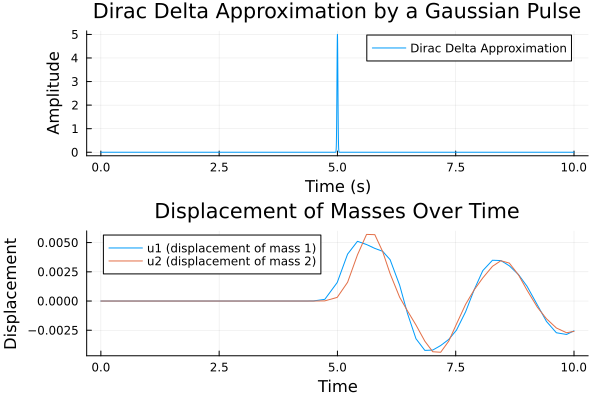

In [1]:
# Define parameters
m1 = 75.0  # Mass 1 (between 50 and 100 kg)
m2 = 85.0  # Mass 2 (between 50 and 100 kg)
ω01 = 2.0  # Resonance frequency for mass 1
ω02 = 2.5  # Resonance frequency for mass 2

k1 = m1 * ω01^2  # Spring constant k1
k3 = m2 * ω02^2  # Spring constant k3
k2 = 1500.0      # Spring constant k2 (chosen to create coupling between the masses)

γ1 = 20.0  # Damping coefficient γ1
γ2 = 25.0  # Damping coefficient γ2
γ3 = 30.0  # Damping coefficient γ3

# Define the external impulsive force (Dirac) on mass 1 at t = 0.5
F0 = 5
t0 = 5.0                      # Time of impact
sigma = 0.18                  # Width of Gaussian pulse
epsilon = 0.01                # Width of the Dirac delta approximation

# Define the Gaussian pulse function to approximate a Dirac delta function
function gaussian_pulse(t, t0, F0, sigma)
    return F0 * exp(-((t - t0)^2) / (2 * sigma^2))
end

# Function for external force on mass 2 (no external force here)
F_external2(t) = 0.0

# Definition of the first-order ODE system
function system!(du, u, p, t)
    x1, v1, x2, v2 = u  # positions and velocities
    
    du[1] = v1
    du[2] = (gaussian_pulse(t, t0, F0, sigma) - γ1*v1 - γ2*(v1 - v2) - k1*x1 - k2*(x1 - x2)) / m1
    du[3] = v2
    du[4] = (F_external2(t) - γ3*v2 - γ2*(v2 - v1) - k3*x2 - k2*(x2 - x1)) / m2
end

# Initial conditions: zero initial positions and velocities
u0 = [0.0, 0.0, 0.0, 0.0]

# Time interval for plotting the Dirac delta approximation
t = 0:0.001:10

# Calculate the Dirac delta approximation
dirac_approx = [gaussian_pulse(ti, t0, F0, epsilon) for ti in t]

# Time span for the simulation
tspan = (0.0, 10.0)

# Plot the Dirac delta approximation
p0 = plot(t, dirac_approx, label="Dirac Delta Approximation", xlabel="Time (s)", ylabel="Amplitude", title="Dirac Delta Approximation by a Gaussian Pulse")

# Define the first-order ODE problem
prob = ODEProblem(system!, u0, tspan)

# Solve the problem using the Tsit5() method
sol = solve(prob, Tsit5())

# Plot the results of the displacements
p1 = plot(sol.t, sol[1,:], label="u1 (displacement of mass 1)", xlabel="Time", ylabel="Displacement", title="Displacement of Masses Over Time")
plot!(sol.t, sol[3,:], label="u2 (displacement of mass 2)")

plot(p0, p1, layout = (2, 1))

2. **Compare Analytical and Numerical Solutions**:

Compare the time-domain solutions $ u_1(t) $ and $ u_2(t) $ obtained analytically and numerically.

3. **Study stiffness**:

We examine how different natural frequencies $(\omega)$ affect the dynamic behavior of a mechanical system by using significantly different mass values. The stiffness $(k)$ of the system is defined as $k = m \cdot \omega^2$.
This approach helps identify critical dynamics and stability parameters across a range of operational conditions, which is essential for designing robust mechanical systems.

Delta t for m1 = 50.0 kg and m2 = 50.0 kg: 0.23255813953488372
Delta t for m1 = 50.0 kg and m2 = 100.0 kg: 0.2222222222222222
Delta t for m1 = 50.0 kg and m2 = 500.0 kg: 0.22727272727272727


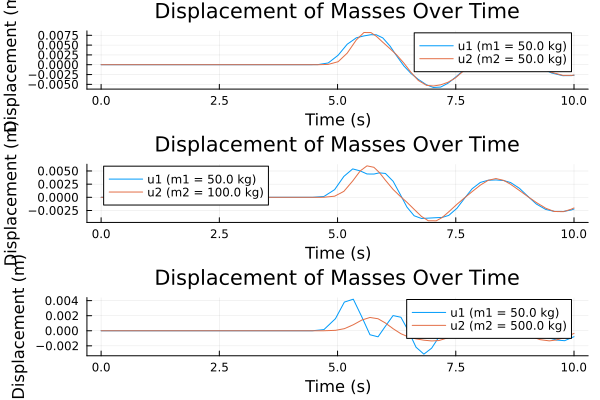

In [20]:
# Define the external force functions and ODE system
function gaussian_pulse(t, t0, F0, sigma)
    return F0 * exp(-((t - t0)^2) / (2 * sigma^2))
end

F_external2(t) = 0.0

function system!(du, u, p, t)
    m1, m2, ω01, ω02, k2, γ1, γ2, γ3, t0, F0, sigma = p
    k1 = m1 * ω01^2
    k3 = m2 * ω02^2
    x1, v1, x2, v2 = u

    du[1] = v1
    du[2] = (gaussian_pulse(t, t0, F0, sigma) - γ1*v1 - γ2*(v1 - v2) - k1*x1 - k2*(x1 - x2)) / m1
    du[3] = v2
    du[4] = (F_external2(t) - γ3*v2 - γ2*(v2 - v1) - k3*x2 - k2*(x2 - x1)) / m2
end

# Simulate and plot for different masses, and calculate delta t
function simulate_mass_system(mass_cases)
    ω01 = 2.0
    ω02 = 2.5
    k2 = 1500.0
    γ1 = 20.0
    γ2 = 25.0
    γ3 = 30.0
    t0 = 5.0
    F0 = 5
    sigma = 0.18
    tspan = (0.0, 10.0)
    u0 = [0.0, 0.0, 0.0, 0.0]

    plots = []
    for (m1, m2) in mass_cases
        p = [m1, m2, ω01, ω02, k2, γ1, γ2, γ3, t0, F0, sigma]
        prob = ODEProblem(system!, u0, tspan, p)
        sol = solve(prob, Tsit5())
        plt = plot(sol.t, sol[1, :], label="u1 (m1 = $m1 kg)", xlabel="Time (s)", ylabel="Displacement (m)")
        plot!(plt, sol.t, sol[3, :], label="u2 (m2 = $m2 kg)")
        push!(plots, plt)
        
        # Calculate delta t for each solution
        delta_ts = diff(sol.t)
        println("Delta t for m1 = $m1 kg and m2 = $m2 kg: ", mean(delta_ts))
    end
    plot(plots..., layout = (length(mass_cases), 1), title="Displacement of Masses Over Time")
end

# Define mass cases for simulation
mass_cases = [(50.0, 50.0), (50.0, 100.0), (50.0, 500.0)]

# Call the simulation function
simulate_mass_system(mass_cases)


In the results of the simulation, as stiffness increases (through greater mass or stiffer springs), the natural frequencies of the system increase. Numerical solvers must then reduce the time step $\Delta t$ to capture these faster oscillations accurately. This ensures stability and accuracy in the solution but contradicts the observed pattern.

In systems where mass significantly increases (scenario 3), the dynamics can shift towards being inertia-dominated rather than stiffness-dominated, potentially allowing for larger time steps due to slower system responses. Additionally, if damping is not proportionally increased with mass, its relative influence may decrease, leading to feasible larger $\Delta t$ as the system's oscillatory response slows.

4. **Frequency spectra**:

Plot the frequency spectra of both masses over time to visualize the response of the system.

### 4.5 Vibration study 


Impose forced vibration with driving frequency \omega_d on one of two point masses. Proceed as before.  Investigate frequency response, in particular \omega_d close to one of both resonant frequencies. 



References: 

https://github.com/ziolai/ventura-modeling/blob/main/jupyter-notebooks/point-mass-systems.ipynb 

